# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}$$

## Intracavity field
$$\begin{align}
\hat{\tilde{\ul{a}}} &= - \left(\nu\dul{\mathbb{1}} - \dul{\Delta} - 
\sqrt{2\pi}\tilde{\dul{f}}\right)^{-1} \hat{\tilde{\ul{B}}} = 
\tilde{\dul{N}}\ \hat{\tilde{\ul{B}}}\\
\dul{\Delta} &= \left(\begin{matrix} 
-(\kappa_a+i\Delta_a) & 0 & g & \epsilon \\
0 & -(\kappa_a-i\Delta_a) & \epsilon^* & g^* \\
-g^* & \epsilon & -(\kappa_b+i\Delta_b) & 0 \\
\epsilon^* & -g & 0 & -(\kappa_b-i\Delta_b)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right)
%\frvecop{a} & = -i \lk\begin{matrix}
%\frac{1}{\Lambda_{ab}}\lk\sqrt{2\kappa_a}d_{-b}\frop{a}_{in}+\sqrt{2\kappa_b}\epsilon\frop{b}^\dagger_{in}\rk\\
%\frac{1}{\Lambda_{ba}}\lk\sqrt{2\kappa_a}d_{+b}\frop{a}^\dagger_{in}+\sqrt{2\kappa_b}\epsilon^*\frop{b}_{in}\rk\\
%\frac{1}{\Lambda_{ba}}\lk\sqrt{2\kappa_a}\epsilon\frop{a}^\dagger_{in}+\sqrt{2\kappa_b}d_{-b}\frop{b}_{in}\rk\\
%\frac{1}{\Lambda_{ab}}\lk\sqrt{2\kappa_a}\epsilon^*\frop{a}_{in}+\sqrt{2\kappa_b}d_{+b}\frop{b}^\dagger_{in}\rk\end{matrix}\rk\\
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\dul{\kappa}_1^{-1}\lk\dul{\kappa}_1^2+\sqrt{2\pi}\, \frmat{f}\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = \frmat{A}\,\frvecop{a}_{1,in} + \dul{S}\,\frvecop{\xi}\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.\\
Therefore, the intracavity field has the following form:
$$\frvecop{a} = \frmat{N}\lk\frmat{A}\,\frvecop{a}_{1,in}+\dul{S}\,\frvecop{\xi}\rk$$

In [56]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [57]:
dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
ftil = diag(ka*exp(I*(nu*ta+phia)),ka*exp(I*(nu*ta-phia)),kb*exp(I*(nu*tb+phib)),kb*exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = kap1+kap1.inv()*ftil
S    = kap2*L1

N    = Matrix([[dmb/Lab,0,0,eps/Lab],[0,dpb/Lba,conjugate(eps)/Lba,0],\
              [0,eps/Lba,dma/Lba,0],[conjugate(eps)/Lab,0,0,dpa/Lab]])


The intracavity field is:

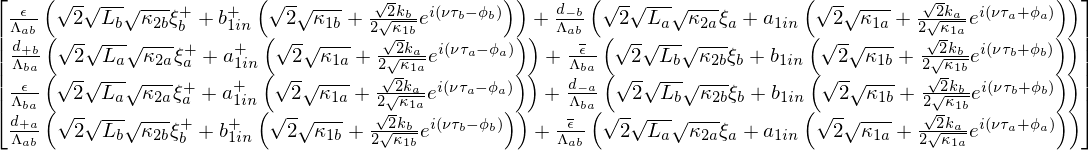

In [58]:
a = (N*(A*ain+S*xi))
a

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lsz\frac{d_{-b}(\nu)}{\sqrt{2\kappa_{1,a}}}\lk 2 \kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk \frop{a}_{1,in}(\nu)+\right.\\
&\quad\left. \frac{\epsilon}{\sqrt{2\kappa_{1,b}}}\lk 2\kappa_{1,b} + k_b e^{i\lk\nu\tau_b-\phi_b\rk}\rk\frop{b}^\dagger_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz =\\
&=\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon \alpha^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{-a}(\nu)\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon^* \alpha(\nu) \frop{a}_{1,in}(\nu)+d_{+a}(\nu)\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

### Output field
$$\begin{align}
\frvecop{a}_{2,out} &= \dul{\kappa}^{-1}\frvecop{B} + \frmat{\kappa}_2\frvecop{a} =\\
&=\lk\dul{\kappa}^{-1} + \dul{\kappa}_2\frmat{N}\rk\lk\frmat{A}\,\frvecop{a}_{1,in}+\dul{S}\,\frvecop{\xi}\rk
\end{align}$$

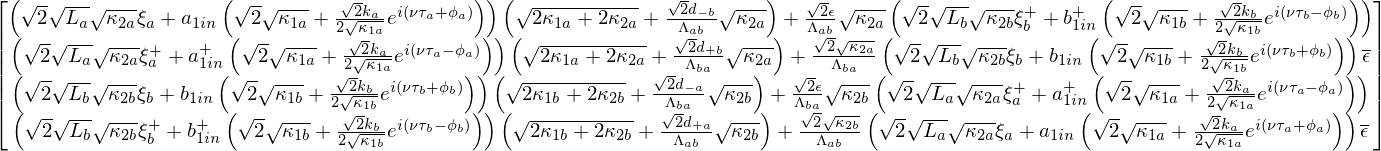

In [59]:
invkap = diag(sqrt(2*(kap1a+kap2a)),sqrt(2*(kap1a+kap2a)),sqrt(2*(kap1b+kap2b)),sqrt(2*(kap1b+kap2b)))
aout = (invkap+kap2*N)*(A*ain+S*xi)
aout

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &= \lk\sqrt{2\kappa_a}+\sqrt{2\kappa_{2,a}}\frac{d_{-b}(\nu)}{\Lambda_{ab}(\nu)}\rk\lk\sqrt{2L_a\kappa_{2a}}\frop{\xi}_a(\nu)+\alpha(\nu)\frop{a}_{1,in}(\nu)\rk+\\
&\quad + \sqrt{2\kappa_{2,a}}\frac{\epsilon}{\Lambda_{ab}(\nu)}\lk\sqrt{2L_b\kappa_{2,b}}\frop{\xi}^\dagger_b(-\nu)+\beta^*(-\nu)\frop{b}^\dagger_{1,in}(t)\rk = \\
&= \frac{\sqrt{2\kappa_{2,a}}}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu)D_a(\nu)\alpha(\nu)\frop{a}_{1,in}(\nu)+\epsilon\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left.\sqrt{2L_a\kappa_{2,a}}d_{-b}(\nu)D_a(\nu)\frop{\xi}_a(\nu)+\sqrt{2L_b\kappa_{2,b}}\epsilon\frop{\xi}_b^\dagger(-\nu)\rsz\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{\sqrt{2\kappa_{2,a}}}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu)D_a^*(-\nu)\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left.\sqrt{2L_a\kappa_{2,a}}d_{+b}(\nu)D_a^*(-\nu)\frop{\xi}^\dagger_a(-\nu)+\sqrt{2L_b\kappa_{2,b}}\epsilon^*\frop{\xi}_b(\nu)\rsz\\
\frop{b}_{2,out}(\nu)&= \frac{\sqrt{2\kappa_{2,b}}}{\Lambda_{ba}(\nu)}\lsz d_{-a}(\nu)D_b(\nu)\beta(\nu)\frop{b}_{1,in}(\nu)+\epsilon\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left.\sqrt{2L_b\kappa_{2,b}}d_{-a}(\nu)D_b(\nu)\frop{\xi}_b(\nu)+\sqrt{2L_a\kappa_{2,a}}\epsilon\frop{\xi}_a^\dagger(-\nu)\rsz\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{\sqrt{2\kappa_{2,b}}}{\Lambda_{ab}(\nu)}\lsz d_{+a}(\nu)D_b^*(-\nu)\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\epsilon^*\alpha(\nu)\frop{a}_{1,in}(\nu)+\right.\\
&\quad\left.\sqrt{2L_b\kappa_{2,b}}d_{+a}(\nu)D_b^*(-\nu)\frop{\xi}^\dagger_b(-\nu)+\sqrt{2L_a\kappa_{2,a}}\epsilon^*\frop{\xi}_a(\nu)\rsz\\
\end{align}$$

## Quadrature variances

The quadratures of the two modes are:
$$\frop{X}_{\mu,\theta^\prime}=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap/2}+\frop{\mu}^\dagger e^{i\thetap/2}\rk$$
The generalized quadratures involve both modes:
$$\frop{X}^G_{\pm,\thetap} = \frac{1}{\sqrt{2}}\lk X_{a,\thetap}\pm X_{b,\thetap}\rk$$



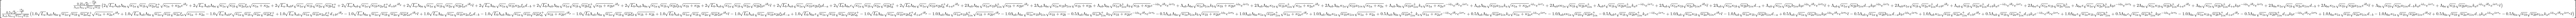

In [72]:
thetap = symbols('\\theta_p')
Xa = 1/2*(aout[0]*exp(-I*thetap/2)+aout[1]*exp(I*thetap/2))
Xb = 1/2*(aout[2]*exp(-I*thetap/2)+aout[3]*exp(I*thetap/2))
XG = 1/sqrt(2)*Matrix([Xa+Xb,Xa-Xb])
factor(XG)